In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy,math

In [77]:
#Loading the dataset
dataset=pd.read_csv('Data/50_Startups.csv')

In [78]:
#Getting a glimpse of Dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
#Seperating the independent and dependent features
#Dependent features
y=np.asarray(dataset["Profit"].values.tolist())

dataset.drop(["Profit"],axis=1,inplace=True)

In [80]:
# Handling the Categorical Variable "State" with the One Hot Encoding Technique
# There are many ways of handling categorical variables, One Hot Encosing is one of them
# First, we get the counts of each value that the feature "State" can take
dataset.iloc[:,3].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [81]:
# Performing Label Encoding
# Replacing California by 1, New York by 2, Florida by 3
dataset.replace(to_replace=["California","New York", "Florida"], value=[1,2,3])

/var/folders/fp/vtxh24v91hxg3qfhstmc8d0c0000gn/T/ipykernel_4575/1286403165.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(to_replace=["California","New York", "Florida"], value=[1,2,3])


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,3
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,3
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,1


In [82]:
# There is no hierarchy relation between the labels
# i.e label 3 does not have more importance than label 1
# To handle this, we create 3 columns with the respective US State names
dataset["California"] = dataset.iloc[:, 3]
dataset["New York"] = dataset.iloc[:,3]
dataset["Florida"] = dataset.iloc[:,3]

In [83]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,New York,New York,New York
1,162597.70,151377.59,443898.53,California,California,California,California
2,153441.51,101145.55,407934.54,Florida,Florida,Florida,Florida
3,144372.41,118671.85,383199.62,New York,New York,New York,New York
4,142107.34,91391.77,366168.42,Florida,Florida,Florida,Florida


In [84]:
# Performing One Hot Encoding for the column "California"
dataset.loc[dataset["California"]!="California", "California"] = 0
dataset.loc[dataset["California"]=="California", "California"] = 1

In [85]:
# Performing One Hot Encoding for the column "New York"
dataset.loc[dataset["New York"]!="New York", "New York"] = 0
dataset.loc[dataset["New York"]=="New York", "New York"] = 1

In [86]:
# Performing One Hot Encoding for the column "Florida"
dataset.loc[dataset.Florida!="Florida", "Florida"] = 0
dataset.loc[dataset.Florida=="Florida", "Florida"] = 1

In [87]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,0,1,0
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,0,1
3,144372.41,118671.85,383199.62,New York,0,1,0
4,142107.34,91391.77,366168.42,Florida,0,0,1


In [88]:
# Dropping the columns
dataset.drop(["State","Florida"], axis = 1, inplace = True)

In [89]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [90]:
X = np.asarray(dataset.values.tolist())

In [91]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (50, 5)
The shape of the dependent fatures are  (50,)


In [92]:
#Reshaping the Dependent features
y = y.reshape(len(y),1) # Changing the shape from (50,) to (50,1)

In [93]:
for i in range(X.shape[1]-2):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [94]:
#Feature Scaling for Dependent Variables
y = (y - int(np.mean(y)))/np.std(y)

In [95]:
#Adding the feature X0 = 1, so we have the equation: y =  (W1 * X1) + (W0 * X0) 
X = np.concatenate((X,np.ones((50,1))), axis = 1)

In [96]:
X

array([[ 2.01642504e+00,  5.60775975e-01,  2.15394390e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.95587388e+00,  1.08282964e+00,  1.92360120e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.75437728e+00, -7.28233968e-01,  1.62652848e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.55479724e+00, -9.63415706e-02,  1.42221104e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.50495075e+00, -1.07989629e+00,  1.28152852e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.27981356e+00, -7.76216010e-01,  1.25421127e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.34007995e+00,  9.32170269e-01, -6.88149122e-01,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.24507020e+00,  8.72003071e-01,  9.32186786e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.03038241e+00,  9.86975162e-01,  8.308

In [97]:
y

array([[ 2.01121935],
       [ 1.99944599],
       [ 1.98085827],
       [ 1.77664326],
       [ 1.35775614],
       [ 1.12726565],
       [ 1.10549657],
       [ 1.09622589],
       [ 1.00748569],
       [ 0.94603849],
       [ 0.85486277],
       [ 0.80818358],
       [ 0.74117086],
       [ 0.55876554],
       [ 0.51604239],
       [ 0.44873569],
       [ 0.37545172],
       [ 0.33478716],
       [ 0.30713202],
       [ 0.26978867],
       [ 0.16195124],
       [-0.01751782],
       [-0.04159662],
       [-0.08215341],
       [-0.08671344],
       [-0.11547707],
       [-0.15735062],
       [-0.17552631],
       [-0.21878153],
       [-0.2758662 ],
       [-0.30260858],
       [-0.36411142],
       [-0.36550788],
       [-0.38177109],
       [-0.38342819],
       [-0.3892749 ],
       [-0.53391559],
       [-0.55293888],
       [-0.77148132],
       [-0.77707766],
       [-0.84639533],
       [-0.85744966],
       [-1.01534864],
       [-1.05894419],
       [-1.17319297],
       [-1

In [98]:
Independen_Variables=pd.DataFrame(X)

In [99]:
Independen_Variables

,0,1,2,3,4,5
0,2.016425,0.560776,2.153944,0.0,1.0,1.0
1,1.955874,1.082830,1.923601,1.0,0.0,1.0
2,1.754377,-0.728234,1.626528,0.0,0.0,1.0
3,1.554797,-0.096342,1.422211,0.0,1.0,1.0
4,1.504951,-1.079896,1.281529,0.0,0.0,1.0
5,1.279814,-0.776216,1.254211,0.0,1.0,1.0
6,1.340080,0.932170,-0.688149,1.0,0.0,1.0
7,1.245070,0.872003,0.932187,0.0,0.0,1.0
8,1.030382,0.986975,0.830888,0.0,1.0,1.0
9,1.091833,-0.456617,0.776108,1.0,0.0,1.0


In [100]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [101]:
X_train, y_train, X_test, y_test = split_data(X,y)

In [102]:
#Displaying the Data
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (40, 6), X Type:<class 'numpy.ndarray'>)
[[-4.01115378e-01 -6.59300973e-01  2.98180513e-02  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-6.09736394e-01 -1.30863447e+00 -4.54923508e-02  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.53837501e-02  8.21740976e-01 -6.35834687e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-6.00668575e-01  1.31055831e+00 -1.87781008e-03  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 3.96738485e-01 -2.58442307e-01  6.92992870e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.24507020e+00  8.72003071e-01  9.32186786e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.01719429e+00  1.26922245e+00  3.75743081e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.60033681e+00  1.01276996e-01 -1.72739917e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-1.61041980e+00 -2.50938578e+00 -1.74312617e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-1.78594993e-01  1.14247983e+00 -8.5813

In [103]:
# Number of features
num_features = 6

# Initialize weights randomly
w_init = np.random.rand(num_features)

# Initialize bias term
b_init = 0.0

print("Initial weights:", w_init)
print("Initial bias:", b_init)

Initial weights: [0.13521817 0.32414101 0.14967487 0.22232139 0.38648898 0.90259848]
Initial bias: 0.0


In [104]:
#Displaying the Data
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (40, 6), X Type:<class 'numpy.ndarray'>)
[[-4.01115378e-01 -6.59300973e-01  2.98180513e-02  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-6.09736394e-01 -1.30863447e+00 -4.54923508e-02  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.53837501e-02  8.21740976e-01 -6.35834687e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-6.00668575e-01  1.31055831e+00 -1.87781008e-03  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 3.96738485e-01 -2.58442307e-01  6.92992870e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.24507020e+00  8.72003071e-01  9.32186786e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.01719429e+00  1.26922245e+00  3.75743081e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.60033681e+00  1.01276996e-01 -1.72739917e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-1.61041980e+00 -2.50938578e+00 -1.74312617e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-1.78594993e-01  1.14247983e+00 -8.5813

In [105]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [106]:
print(X.shape[0])

50


In [107]:
#Calculating the gradinet
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i,j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_db,dj_dw

In [108]:
#Gradient Descent

def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    
    for i in range(num_iters):
        dj_db,dj_dw=gradient_function(X,y,w,b)
        
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i<100000:
            J_history.append(cost_function(X,y,w,b))
        
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
    return w,b,J_history

In [109]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.00000000000001
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
#print("b,w found by gradient descent: ",b_final,w_final)
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final}, target value: {y_train[i]}")
    #print(f"Prediction:{np.dot(X_train[i],w_final)+b_final},Target Value:{y_train[i]}  ")
    pass

Iteration 0: Cost [0.51631703]   
Iteration 100: Cost [0.51631703]   


Iteration 200: Cost [0.51631703]   
Iteration 300: Cost [0.51631703]   

/var/folders/fp/vtxh24v91hxg3qfhstmc8d0c0000gn/T/ipykernel_4575/1013452028.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*X[i,j]



Iteration 400: Cost [0.51631703]   
Iteration 500: Cost [0.51631703]   
Iteration 600: Cost [0.51631703]   
Iteration 700: Cost [0.51631703]   
Iteration 800: Cost [0.51631703]   
Iteration 900: Cost [0.51631703]   
b,w found by gradient descent: [-6.42978227e-13],[ 1.00500333e-11  3.10058403e-12  7.81163436e-12 -1.06553136e-12
  5.13586689e-13 -6.42978227e-13] 
prediction: [-7.1284697e-12], target value: [-0.38177109]
prediction: [-1.13131416e-11], target value: [-0.3892749]
prediction: [-3.34937973e-12], target value: [-0.15735062]
prediction: [-4.33939958e-12], target value: [-0.38342819]
prediction: [7.31336335e-12], target value: [0.30713202]
prediction: [2.12126617e-11], target value: [1.09622589]
prediction: [1.58073785e-11], target value: [0.51604239]
prediction: [-3.00356009e-11], target value: [-1.18006622]
prediction: [-3.8354368e-11], target value: [-1.91319595]
prediction: [-5.72832078e-12], target value: [-0.2758662]
prediction: [1.16689013e-11], target value: [0.4487356

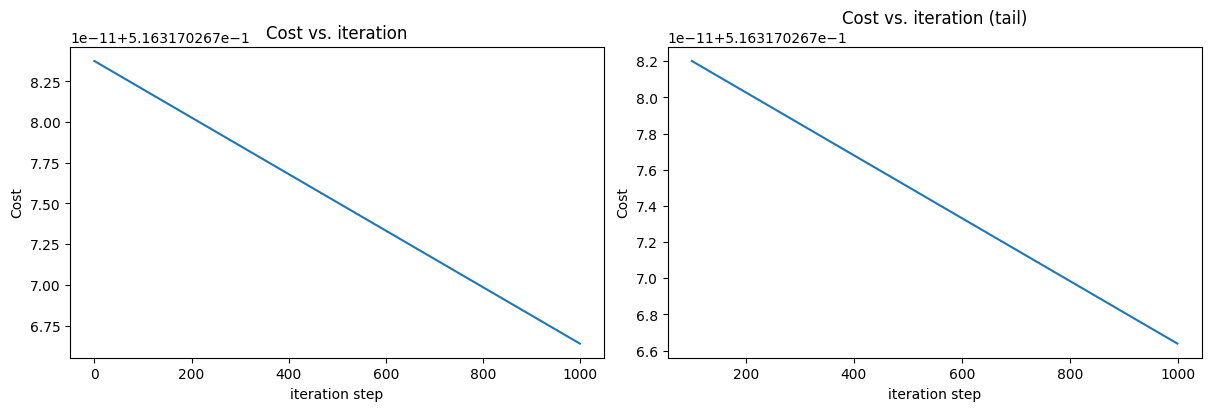

In [110]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [111]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [112]:
regressor = multipleLinearRegression()

In [113]:
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=20000, alpha=0.0001)

/var/folders/fp/vtxh24v91hxg3qfhstmc8d0c0000gn/T/ipykernel_4575/1724077791.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])


In [114]:

#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

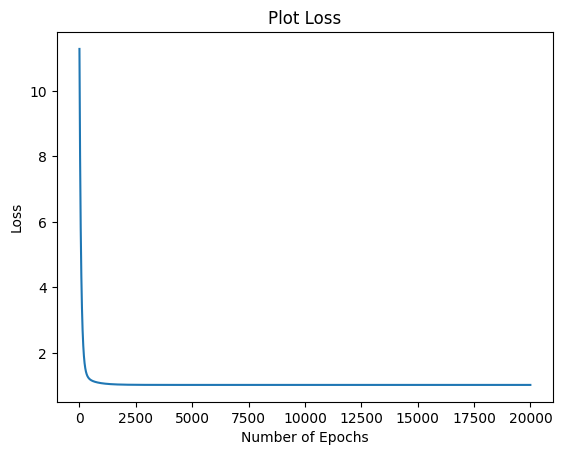

In [115]:
regressor.plotLoss(train_loss, num_epochs)